In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit

In [18]:
plt.style.use(['default'])
# plt.rcParams['text.usetex'] = True

In [19]:
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

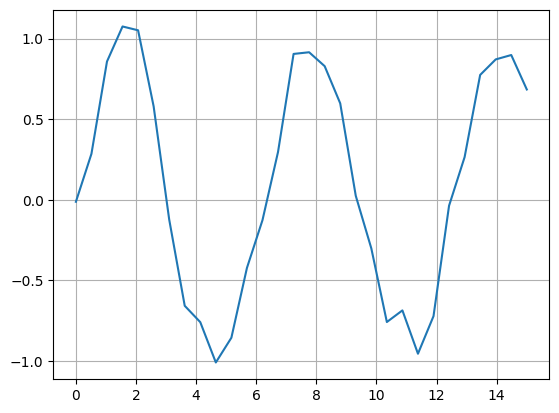

In [20]:
plt.plot(x,y)
plt.grid()

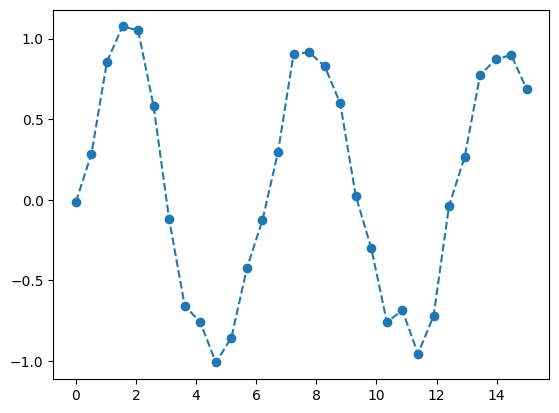

In [21]:
plt.plot(x,y,'o--')

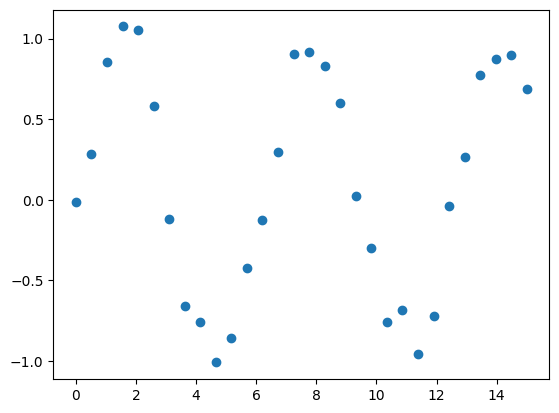

In [22]:
plt.plot(x,y, 'o')

In [23]:
x2 = np.linspace(0,15,100)
y2 = np.sin(x2)

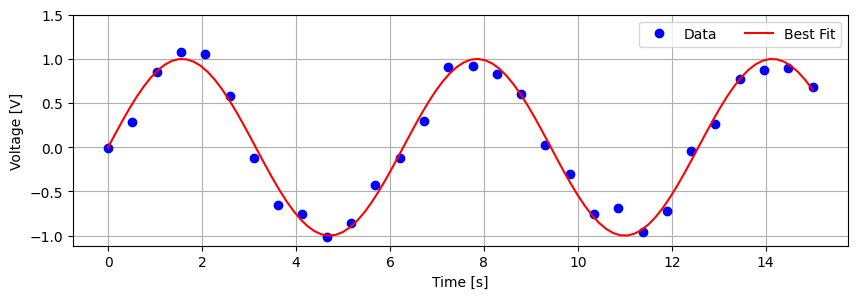

In [24]:
plt.figure(figsize=(10,3))
plt.plot(x,y, 'bo', label = "Data")
plt.plot(x2, y2, 'r', label="Best Fit")
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.ylim(top=1.5)
plt.legend(loc='upper right' ,fontsize=10, ncol=2)

In [25]:
def model(x, a, b, c):
    return a*np.sin(x) + b*np.cos(x) + c

In [26]:
a, b, c = curve_fit(model, xdata=x, ydata=y)[0]

In [27]:
y2 = model(x2, a, b, c)

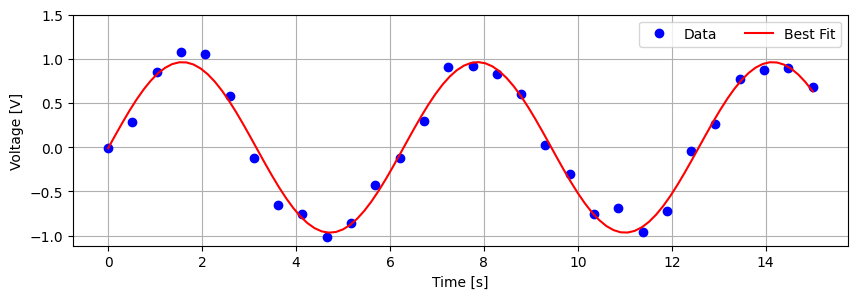

In [28]:
plt.figure(figsize=(10,3))
plt.plot(x,y, 'bo', label = "Data")
plt.plot(x2, y2, 'r', label="Best Fit")
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.ylim(top=1.5)
plt.legend(loc='upper right' ,fontsize=10, ncol=2)

In [29]:
datalol = "1.17 0.002362379474 1.49 0.002956991994 1.94 0.004017652166 2.34 0.00504617112 2.72 0.005592571815 2.94 0.005849701553 3.09 0.005946125205 3.4 0.005978266423 3.58 0.005913983988 3.76 0.005849701553 4.09 0.005688995467 4.39 0.005464006946 4.71 0.005271159642 5 0.00504617112"
datalol = datalol.split(" ")
x_lcr = np.array([eval(datalol[i]) for i in range(0, len(datalol), 2)])
y_lcr = np.array([eval(datalol[i]) for i in range(1, len(datalol), 2)])

In [30]:
datalol="1.02 0.001944543648 1.24 0.002474873734 1.44 0.002969848481 1.6 0.00339411255 1.79 0.003995153314 2 0.004454772721 2.21 0.004772970773 2.39 0.005126524164 2.59 0.005444722215 2.77 0.005727564928 2.89 0.006293250353 3.09 0.006434671709 3.2 0.006470027048 3.31 0.006505382387 3.4 0.006540737726 3.59 0.006505382387 3.71 0.006470027048 3.8 0.006434671709 3.98 0.006363961031 4.25 0.006257895014 4.69 0.00601040764 5 0.005833630945 5.43 0.005550788232 5.81 0.005409366876 6.06 0.00526794552"
datalol = datalol.split(" ")
x_lcr2 = np.array([eval(datalol[i]) for i in range(0, len(datalol), 2)])
y_lcr2 = np.array([eval(datalol[i]) for i in range(1, len(datalol), 2)])

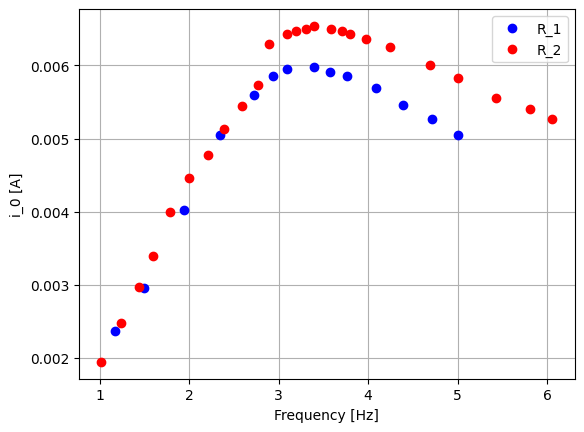

In [31]:
plt.plot(x_lcr,y_lcr, 'bo', label = "R_1")
plt.plot(x_lcr2,y_lcr2, 'ro', label = "R_2")
plt.xlabel('Frequency [Hz]')
plt.ylabel('i_0 [A]')
plt.grid()
plt.legend(loc='upper right' ,fontsize=10)

In [32]:
def lcr_fit(x, f0, Q, i0):
    return i0 / np.sqrt(1 + (Q**2 * ((x/f0) - (f0/x))**2))

In [33]:
f0_1, Q1, i0_1 = curve_fit(lcr_fit, x_lcr, y_lcr, p0 = [3.43, 1, 0.006])[0]
f0_2, Q2, i0_2 = curve_fit(lcr_fit, x_lcr2, y_lcr2, p0 = [3.43, 1, 0.0063])[0]

In [34]:
x1 = np.linspace(0.9, 6.2, 100)
y1 = lcr_fit(x1, f0_1, Q1, i0_1)
y2 = lcr_fit(x1, f0_2, Q2, i0_2)

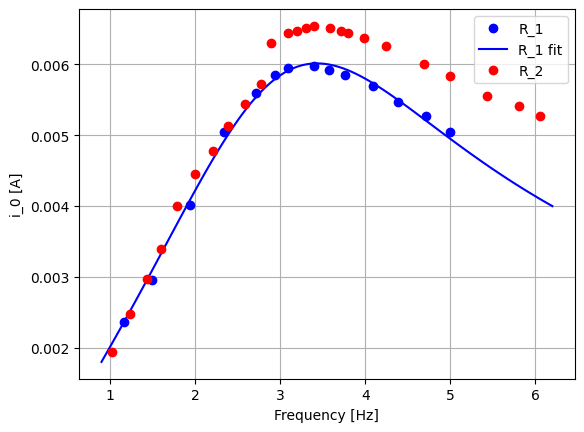

In [35]:
plt.plot(x_lcr,y_lcr, 'bo', label = "R_1")
plt.plot(x1,y1, 'b-', label = "R_1 fit")
plt.plot(x_lcr2,y_lcr2, 'ro', label = "R_2")
# plt.plot(x2,y2, 'r-', label = "R_2 fit")
plt.xlabel('Frequency [Hz]')
plt.ylabel('i_0 [A]')
plt.grid()
plt.legend(loc='upper right' ,fontsize=10)